## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [32]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [7]:
# Проверка структуры данных
Xtrain.head(), Xtest.head()
# Проверка структуры данных
Xtrain.head(), Xtest.head()

(   f1          f2      f3        f4  f5        f6        f7        f8  \
 0  50  218.593930  273536  0.104575   4  0.445026  0.274531  0.444334   
 1  32  276.771005  173314  0.224684  11  0.445026  0.439103  0.444334   
 2  38  218.593930   28887  0.032491   7  0.445026  0.274531  0.444334   
 3  19  218.593930  427862  0.179322  10  0.049127  0.044987  0.009499   
 4  44  218.593930  109339  0.032491   7  0.098837  0.115721  0.066581   
 
           f9       f10  f11  f12  f13       f14  target  
 0   5.970149  0.300298  0.0    0   49  0.100000       0  
 1   5.970149  0.300298  0.0    0   60  0.244418       0  
 2  25.606721  0.300298  0.0    0   50  0.244418       0  
 3  25.606721  0.300298  0.0    0   35  0.244418       0  
 4   5.970149  0.113590  0.0    0   46  0.185185       0  ,
    f1          f2      f3        f4  f5        f6        f7        f8  \
 0  31  238.933333   47296  0.238933  10  0.238933  0.238933  0.238933   
 1  24  238.933333   33088  0.238933   7  0.238933 

In [10]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


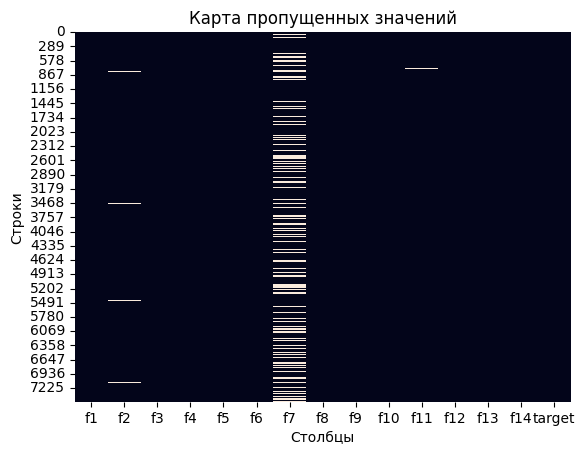

In [11]:
sns.heatmap(Xtrain.isnull(), cbar=False)
plt.ylabel('Строки')
plt.xlabel('Столбцы')
plt.title('Карта пропущенных значений')
plt.show()

In [12]:
# Подготовка данных
Xtrain = Xtrain.fillna(0)

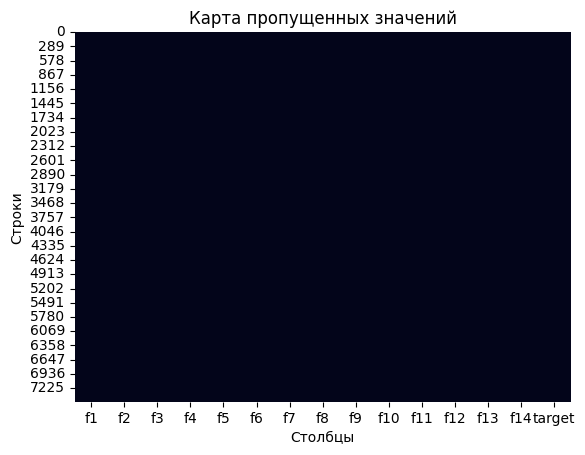

In [13]:
sns.heatmap(Xtrain.isnull(), cbar=False)
plt.ylabel('Строки')
plt.xlabel('Столбцы')
plt.title('Карта пропущенных значений')
plt.show()

In [14]:
Xtrain.info()
Xtrain.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      7500 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7500 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [15]:
Xtrain.tail()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
7495,48,218.593930,329778,0.171817,9,0.066372,0.000000,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1
7499,29,263.691684,180916,0.179322,10,0.066390,0.131370,0.066581,25.606721,0.113590,0.0,0,38,0.244418,0


### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

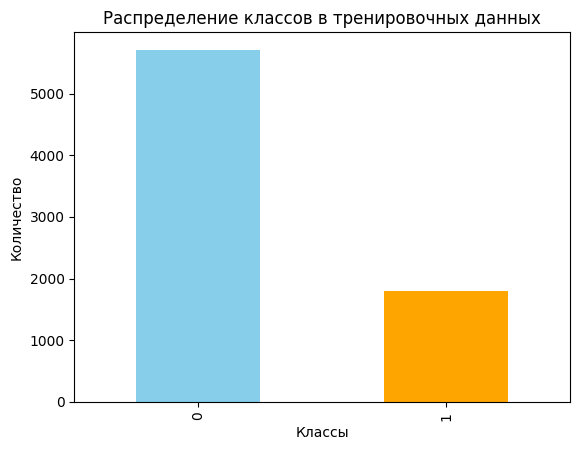

In [16]:
# Визуализация распределения целевых классов
Xtrain['target'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Распределение классов в тренировочных данных")
plt.xlabel("Классы")
plt.ylabel("Количество")
plt.show()

**Вывод**:  использование метрики accuracy в задаче с таким распределением классов (значительный дисбаланс) не является оптимальным

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [17]:
# Разделение тренировочных данных
X = Xtrain.drop(columns='target', axis=1)
y = Xtrain['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_val)
log_reg_f1 = f1_score(y_val, log_reg_pred)

print(f"Логистическая регрессия, f1_score: {log_reg_f1:.4f}")

Логистическая регрессия, f1_score: 0.3697


c:\Users\Александр Костромин\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_val)
svc_f1 = f1_score(y_val, svc_pred)

print(f"SVC, f1_score: {svc_f1:.4f}")

SVC, f1_score: 0.0839


### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [22]:
# Логистическая регрессия с балансировкой классов
logreg_balanced = LogisticRegression(class_weight='balanced', random_state=42)
logreg_balanced.fit(X_train, y_train)

# Предсказания
y_pred_logreg_balanced = logreg_balanced.predict(X_val)

# Вычисление F1-score
f1_logreg_balanced = f1_score(y_val, y_pred_logreg_balanced)
print(f"Логистическая регрессия с class_weight='balanced', F1-score: {f1_logreg_balanced:.4f}")

Логистическая регрессия с class_weight='balanced', F1-score: 0.4578


c:\Users\Александр Костромин\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# SVC с оптимизированными гиперпараметрами
svc_tuned = SVC(C=10, kernel='rbf', class_weight='balanced', random_state=42)
svc_tuned.fit(X_train, y_train)

# Предсказания
y_pred_svc_tuned = svc_tuned.predict(X_val)

# Вычисление F1-score
f1_svc_tuned = f1_score(y_val, y_pred_svc_tuned)
print(f"SVC с измененными параметрами, F1-score: {f1_svc_tuned:.4f}")

SVC с измененными параметрами, F1-score: 0.2913


In [30]:
# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_val)

# Логистическая регрессия с полиномиальными признаками
logreg_poly = LogisticRegression(random_state=42)
logreg_poly.fit(X_train_poly, y_train)

# Предсказания
y_pred_logreg_poly = logreg_poly.predict(X_test_poly)

# Вычисление F1-score
f1_logreg_poly = f1_score(y_val, y_pred_logreg_poly)
print(f"Логистическая регрессия с полиномиальными  признаками, F1-score: {f1_logreg_poly:.4f}")

# SVC с полиномиальными признаками
svc_poly = SVC(random_state=42)
svc_poly.fit(X_train_poly, y_train)

# Предсказания
y_pred_svc_poly = svc_poly.predict(X_test_poly)

# Вычисление F1-score
f1_svc_poly = f1_score(y_val, y_pred_svc_poly)
print(f"SVC с полиномиальными  признаками, F1-score: {f1_svc_poly:.4f}")

Логистическая регрессия с полиномиальными  признаками, F1-score: 0.3727
SVC с полиномиальными  признаками, F1-score: 0.0248


c:\Users\Александр Костромин\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [38]:
# Разделение тренировочных данных
X = Xtest.drop(columns='target', axis=1)
y = Xtest['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Логистическая регрессия с балансировкой классов
logreg_balanced = LogisticRegression(class_weight='balanced', random_state=42)
logreg_balanced.fit(X_train, y_train)

# Предсказания
y_pred_logreg_balanced = logreg_balanced.predict(X_val)

# Вычисление F1-score
f1_logreg_balanced = f1_score(y_val, y_pred_logreg_balanced)
print(f"Логистическая регрессия с class_weight='balanced', F1-score: {f1_logreg_balanced:.4f}")

Логистическая регрессия с class_weight='balanced', F1-score: 0.5070


c:\Users\Александр Костромин\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
y_pred_logreg_balanced


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [55]:
# Поддбор значения альфа
alphas = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    pred_final = alpha * y_pred_logreg_poly + (1 - alpha) * y_pred_logreg_balanced
    mse = mean_squared_error(y_val, pred_final)
    print(f"alpha: {alpha}, mse: {mse}")
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print('Best alpha:', best_alpha)

alpha: 0.01, mse: 0.2788816
alpha: 0.1, mse: 0.24735999999999997
alpha: 0.2, mse: 0.21770666666666666
alpha: 0.3, mse: 0.19370666666666664
alpha: 0.4, mse: 0.17536
alpha: 0.5, mse: 0.16266666666666665
alpha: 0.6, mse: 0.1556266666666667
alpha: 0.7, mse: 0.15424
alpha: 0.8, mse: 0.15850666666666668
alpha: 0.9, mse: 0.16842666666666667
alpha: 1.0, mse: 0.184
Best alpha: 0.7


In [59]:
pred_final = best_alpha * y_pred_logreg_poly + (1 - best_alpha) * y_pred_logreg_balanced

In [54]:
pred_final

array([0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. ,
       0. , 1. , 0. , 0. , 0.3, 0. , 0.3, 0. , 0. , 1. , 0. , 0. , 0. ,
       0.3, 0. , 0. , 1. , 0.3, 0.3, 1. , 0.3, 0. , 0. , 0. , 0. , 0.3,
       0. , 1. , 0. , 0. , 0. , 1. , 0. , 0.3, 0.3, 0. , 0.3, 0.3, 0. ,
       0. , 1. , 0. , 0.3, 0. , 0.3, 0. , 0.3, 0.3, 0. , 0.3, 0. , 0. ,
       0.3, 0. , 0.3, 0. , 0. , 0.3, 0. , 0. , 0. , 1. , 0. , 0.3, 0. ,
       0. , 0. , 0.3, 0.3, 0. , 0.3, 0. , 0.3, 1. , 0. , 0. , 0. , 0. ,
       0.3, 0. , 0. , 0.3, 0.3, 0.3, 0.3, 0.3, 1. , 0.3, 1. , 0.3, 0. ,
       0. , 0.3, 0.3, 0. , 0. , 0.3, 0. , 0.3, 0.3, 0.3, 0. , 0.3, 0. ,
       1. , 0. , 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0. , 0.3, 1. , 0.3,
       0.3, 0.3, 0. , 0. , 0.3, 0. , 0.3, 0.3, 0.3, 1. , 0.3, 0.3, 0. ,
       0. , 0.3, 0. , 0. , 1. , 0.3, 0. , 0.3, 0. , 0.3, 0. , 0. , 0. ,
       0. , 0. , 0.3, 0.3, 0. , 0. , 0.3, 0.3, 0.3, 0. , 1. , 1. , 0. ,
       0. , 0.3, 1. , 0. , 0. , 0.3, 0.3, 0. , 0. , 1. , 0. , 0.

In [64]:
# Преобразование вероятностей в бинарные метки
pred_final_binary = [1 if p >= 0.5 else 0 for p in pred_final]

In [66]:
# Вычисление F1-score
f1_final = f1_score(y_val, pred_final_binary)
print(f"Смешанная модель, F1-score: {f1_final:.4f}")

Смешанная модель, F1-score: 0.3727


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

**Выводы:**
- Для улучшения работы baseline-моделей использовали следущие подходы:
    - балансировка классов
    - SVC с оптимизированными гиперпараметрами
    - Создание полиномиальных признаков
    - смешивание различных моделей
- Максимального качества удолось достичь логистической регрессией с балансировкой классов (F1-score: 0.507)
- На отложенной выборке получилось достичь того же значения (F1-score: 0.5070)
- Модель не подходит так как заначение F1-score: 0.507, а значит, что это сопастовимо со случайным выбором



Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.